## 📦 Installation

In [81]:
# # Install Ak-dskit
# !pip install Ak-dskit -q
# print("✅ Ak-dskit installed successfully!")

## 📚 Import Libraries

In [82]:
# Import dskit
from dskit import dskit, load, fix_dtypes, quick_eda, auto_encode, auto_scale
from dskit.eda import basic_stats
from dskit.visualization import plot_correlation_heatmap, plot_histograms, plot_boxplots
from dskit.modeling import QuickModel, compare_models, auto_hpo
from dskit.explainability import explain_shap
from dskit.comprehensive_eda import comprehensive_eda
from dskit.feature_engineering import create_polynomial_features

# Standard libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_diabetes, load_iris
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

# Check dskit version
import dskit
print(f"\n📌 Ak-dskit version: {dskit.__version__}")

✅ All libraries imported successfully!

📌 Ak-dskit version: 1.0.5


---
# 🎯 PART 1: Classification Task - Breast Cancer Dataset
---

## 1️⃣ Data Loading

In [83]:
# Load breast cancer dataset from sklearn
cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df_cancer['target'] = cancer_data.target

print("🔬 Breast Cancer Dataset Loaded")
print(f"📊 Shape: {df_cancer.shape}")
print(f"🎯 Target Classes: {cancer_data.target_names}")
print(f"\n📋 First 5 rows:")
df_cancer.head()

🔬 Breast Cancer Dataset Loaded
📊 Shape: (569, 31)
🎯 Target Classes: ['malignant' 'benign']

📋 First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2️⃣ Basic Data Information

In [84]:
# Dataset info
print("📊 Dataset Information:")
df_cancer.info()

print("\n📈 Target Distribution:")
print(df_cancer['target'].value_counts())
print(f"\n✅ Class Balance: {df_cancer['target'].value_counts(normalize=True).round(3)}")

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smo

## 3️⃣ Quick Statistics with dskit

In [85]:
# Basic statistics using dskit
print("📊 Basic Statistics using dskit.basic_stats():")
stats = basic_stats(df_cancer)
stats

📊 Basic Statistics using dskit.basic_stats():


,count,mean,std,min,25%,50%,75%,max,missing_count,missing_percent
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0,0.0
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0,0.0
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0,0.0
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,0,0.0
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0,0.0
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0,0.0
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0,0.0
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0,0.0
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0,0.0
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0,0.0


## 4️⃣ Quick EDA

🔍 Running Quick EDA...
=== Basic Statistics ===
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059

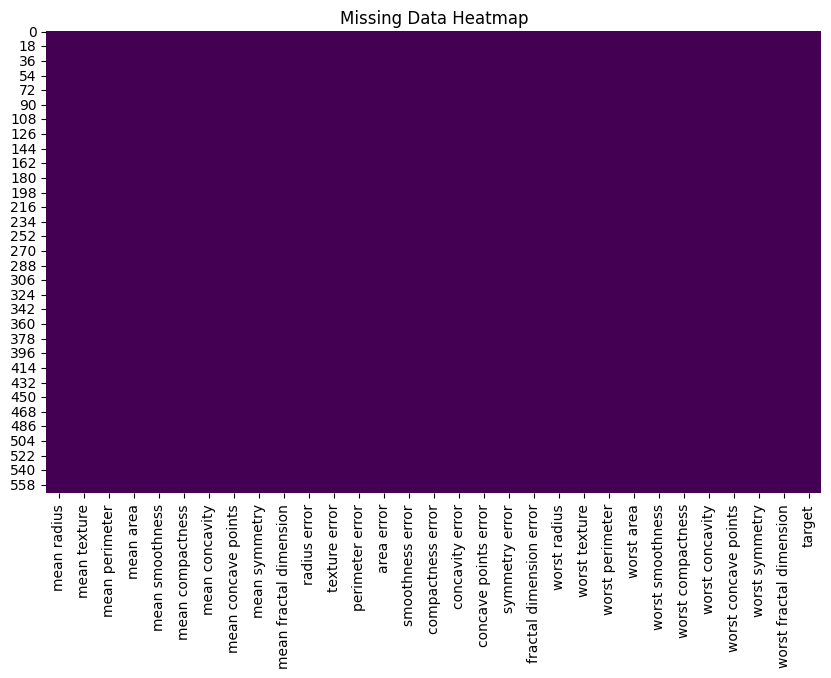

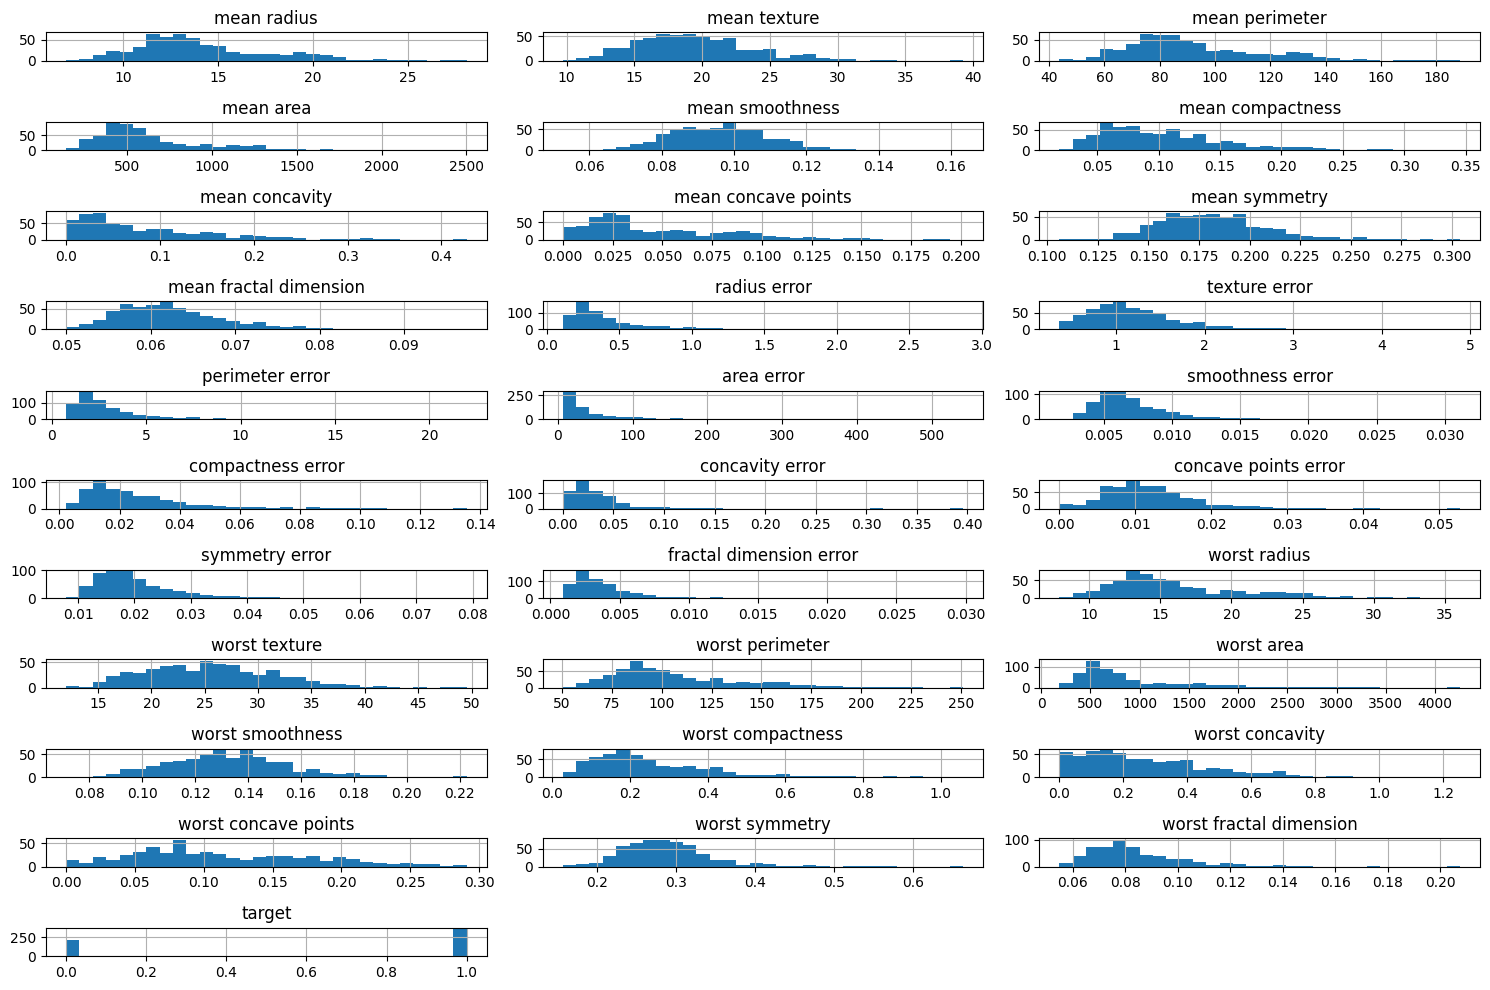

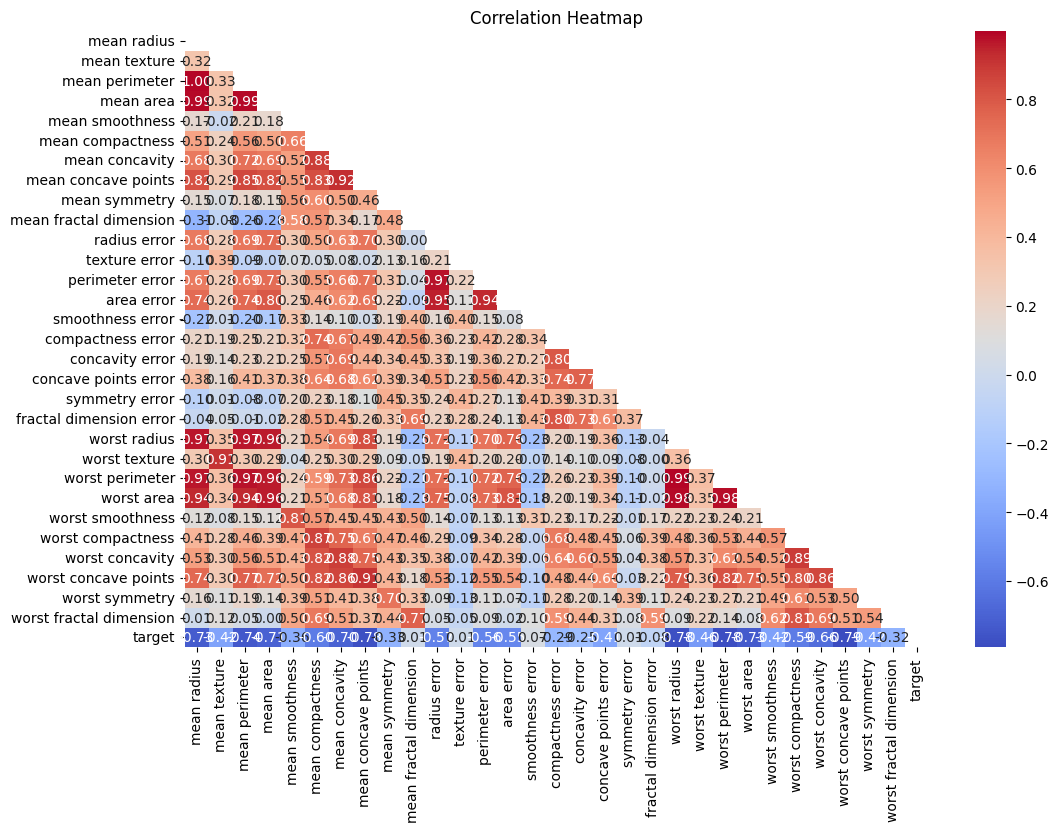

✅ Quick EDA completed!


In [86]:
# Quick EDA
print("🔍 Running Quick EDA...")
eda_results = quick_eda(df_cancer)
print("✅ Quick EDA completed!")

## 5️⃣ Visualizations

🎨 Creating Correlation Heatmap...


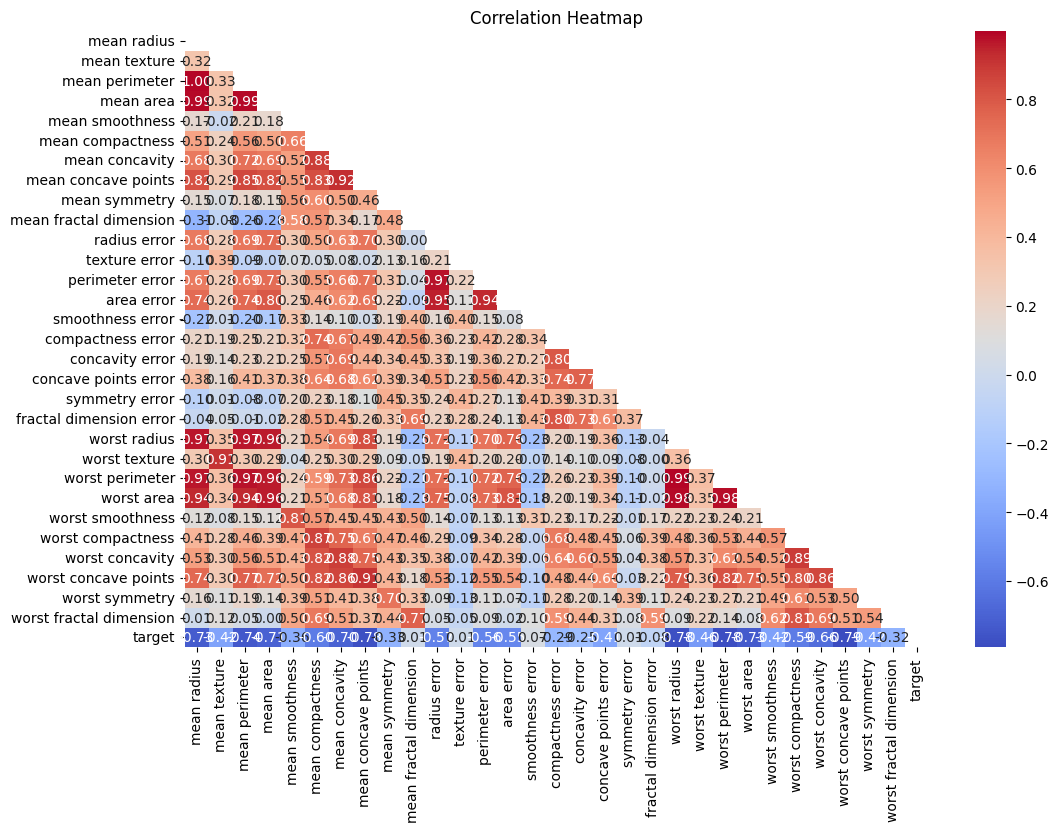

In [87]:
# Correlation heatmap
print("🎨 Creating Correlation Heatmap...")
plot_correlation_heatmap(df_cancer)

📊 Creating Histograms for key features...


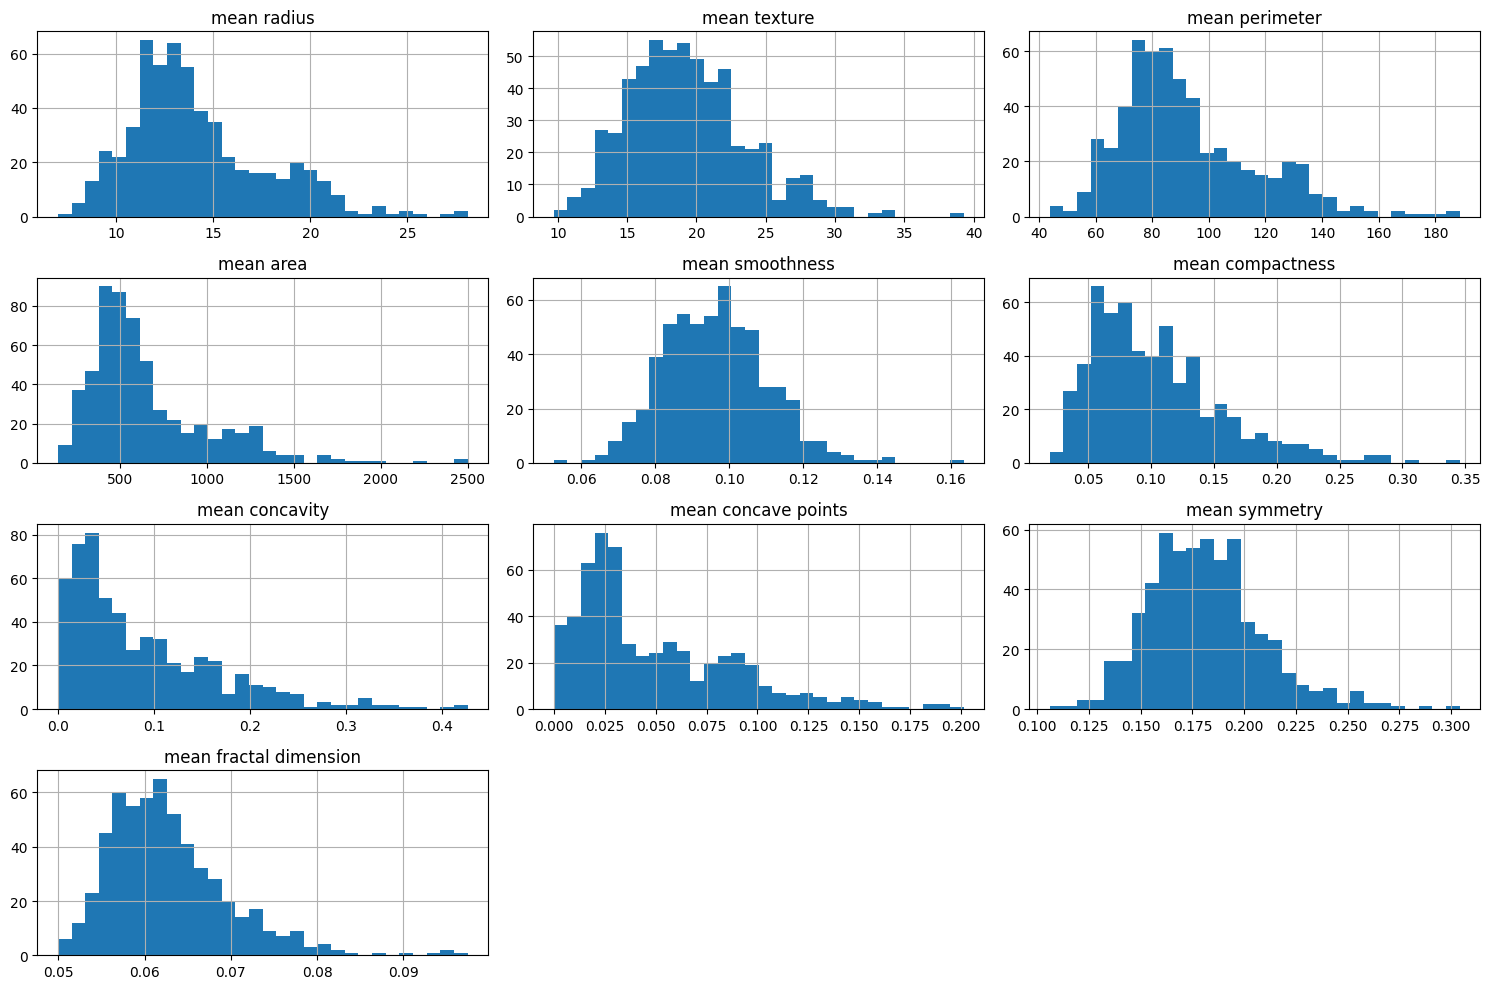

In [88]:
# Distribution plots for first 10 features
print("📊 Creating Histograms for key features...")
plot_histograms(df_cancer.iloc[:, :10])

📦 Creating Boxplots for outlier detection...


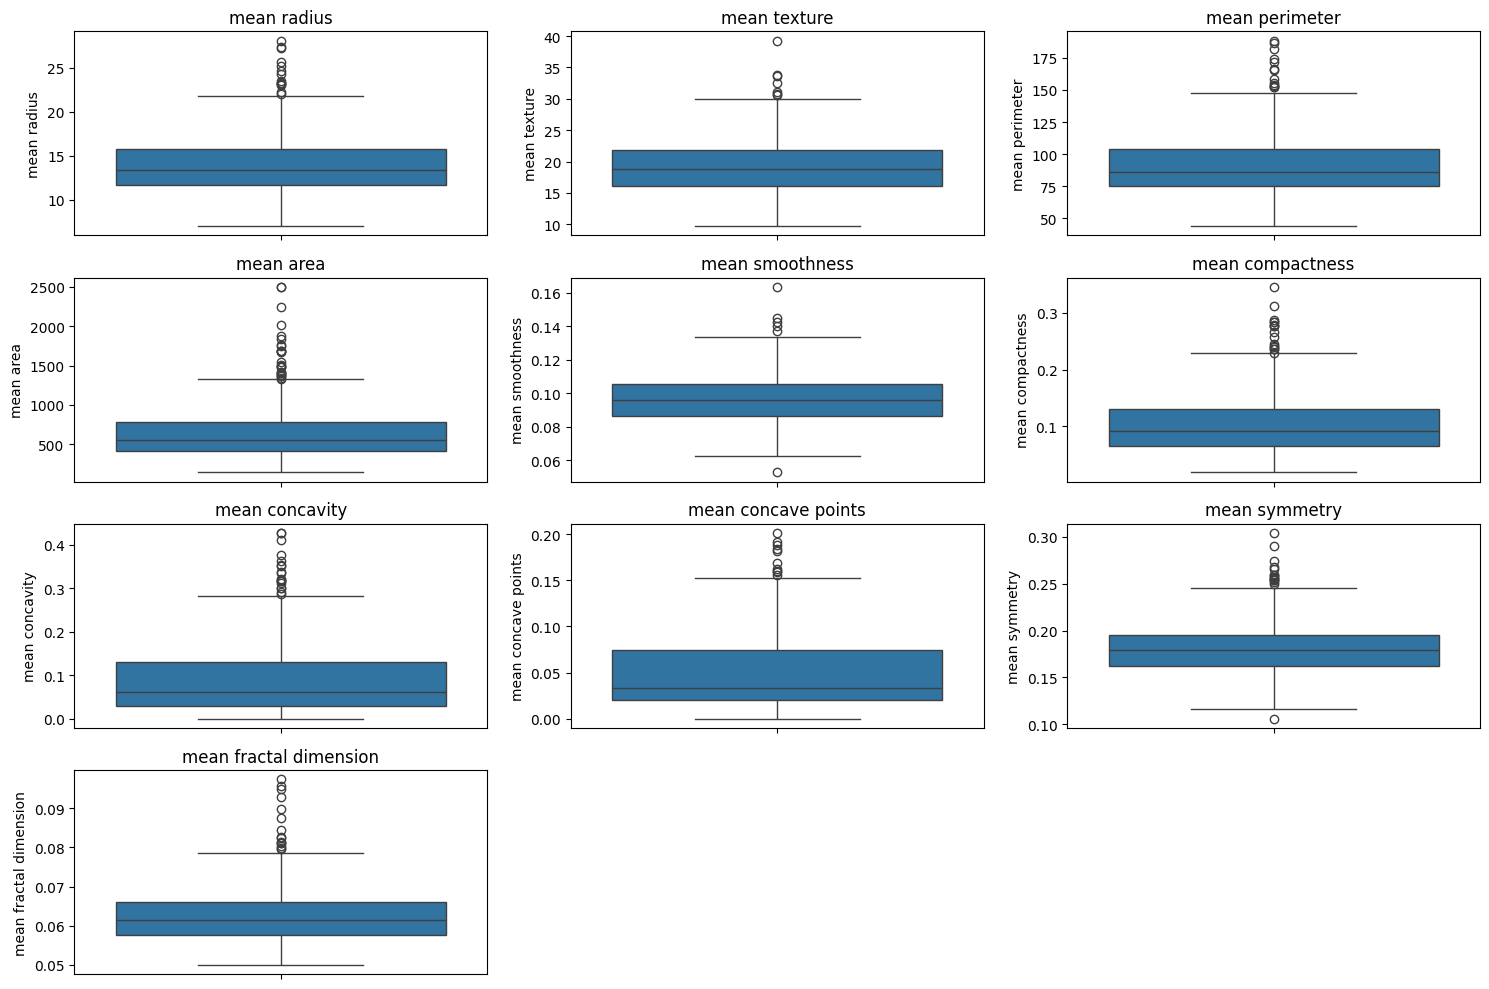

In [89]:
# Boxplots for outlier detection
print("📦 Creating Boxplots for outlier detection...")
plot_boxplots(df_cancer.iloc[:, :10])

## 6️⃣ Data Preprocessing

In [90]:
# Prepare features and target
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

print(f"✅ Features shape: {X_cancer.shape}")
print(f"✅ Target shape: {y_cancer.shape}")

✅ Features shape: (569, 30)
✅ Target shape: (569,)


In [91]:
# Auto scaling using dskit
print("⚙️ Auto-scaling features...")
X_cancer_scaled = auto_scale(X_cancer, method='standard')

print(f"\n✅ Scaled data shape: {X_cancer_scaled.shape}")
print(f"\n📊 Scaled data sample:")
pd.DataFrame(X_cancer_scaled, columns=X_cancer.columns).head()

⚙️ Auto-scaling features...

✅ Scaled data shape: (569, 30)

📊 Scaled data sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 7️⃣ Feature Engineering

In [92]:
# Create polynomial features for first 5 features
print("🔧 Creating polynomial features...")
X_poly = create_polynomial_features(X_cancer.iloc[:, :5], degree=2)

print(f"✅ Original features: {X_cancer.iloc[:, :5].shape[1]}")
print(f"✅ After polynomial features: {X_poly.shape[1]}")
print(f"\n📊 Sample polynomial features:")
X_poly.head()

🔧 Creating polynomial features...
✅ Original features: 5
✅ After polynomial features: 20

📊 Sample polynomial features:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean radius^2,mean radius mean texture,mean radius mean perimeter,mean radius mean area,mean radius mean smoothness,mean texture^2,mean texture mean perimeter,mean texture mean area,mean texture mean smoothness,mean perimeter^2,mean perimeter mean area,mean perimeter mean smoothness,mean area^2,mean area mean smoothness,mean smoothness^2
0,17.99,10.38,122.80,1001.0,0.11840,323.6401,186.7362,2209.1720,18007.990,2.130016,107.7444,1274.6640,10390.380,1.228992,15079.8400,122922.800,14.539520,1002001.00,118.51840,0.014019
1,20.57,17.77,132.90,1326.0,0.08474,423.1249,365.5289,2733.7530,27275.820,1.743102,315.7729,2361.6330,23563.020,1.505830,17662.4100,176225.400,11.261946,1758276.00,112.36524,0.007181
2,19.69,21.25,130.00,1203.0,0.10960,387.6961,418.4125,2559.7000,23687.070,2.158024,451.5625,2762.5000,25563.750,2.329000,16900.0000,156390.000,14.248000,1447209.00,131.84880,0.012012
3,11.42,20.38,77.58,386.1,0.14250,130.4164,232.7396,885.9636,4409.262,1.627350,415.3444,1581.0804,7868.718,2.904150,6018.6564,29953.638,11.055150,149073.21,55.01925,0.020306
4,20.29,14.34,135.10,1297.0,0.10030,411.6841,290.9586,2741.1790,26316.130,2.035087,205.6356,1937.3340,18598.980,1.438302,18252.0100,175224.700,13.550530,1682209.00,130.08910,0.010060


In [93]:
# Create interaction features using sklearn
print("🔧 Creating interaction features...")
from sklearn.preprocessing import PolynomialFeatures

poly_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = pd.DataFrame(
    poly_interaction.fit_transform(X_cancer.iloc[:, :4]),
    columns=poly_interaction.get_feature_names_out(X_cancer.columns[:4])
)

print(f"✅ Original features: {X_cancer.iloc[:, :4].shape[1]}")
print(f"✅ After interaction features: {X_interact.shape[1]}")
print(f"\n📊 Sample interaction features:")
X_interact.head()

🔧 Creating interaction features...
✅ Original features: 4
✅ After interaction features: 10

📊 Sample interaction features:


,mean radius,mean texture,mean perimeter,mean area,mean radius mean texture,mean radius mean perimeter,mean radius mean area,mean texture mean perimeter,mean texture mean area,mean perimeter mean area
0,17.99,10.38,122.80,1001.0,186.7362,2209.1720,18007.990,1274.6640,10390.380,122922.800
1,20.57,17.77,132.90,1326.0,365.5289,2733.7530,27275.820,2361.6330,23563.020,176225.400
2,19.69,21.25,130.00,1203.0,418.4125,2559.7000,23687.070,2762.5000,25563.750,156390.000
3,11.42,20.38,77.58,386.1,232.7396,885.9636,4409.262,1581.0804,7868.718,29953.638
4,20.29,14.34,135.10,1297.0,290.9586,2741.1790,26316.130,1937.3340,18598.980,175224.700


## 8️⃣ Model Training with QuickModel

In [94]:
# Quick Model Training
print("🤖 Training Quick Model (Random Forest)...")
qm = QuickModel(model_type='rf', task='classification')
qm.fit(X_cancer_scaled, y_cancer)

print("\n✅ Model trained successfully!")
print(f"\n📊 Training Accuracy: {qm.score(X_cancer_scaled, y_cancer):.4f}")

🤖 Training Quick Model (Random Forest)...

✅ Model trained successfully!

📊 Training Accuracy: 1.0000

✅ Model trained successfully!

📊 Training Accuracy: 1.0000


## 9️⃣ Model Comparison

In [95]:
# Compare multiple models
print("🔬 Comparing multiple classification models...")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.2, random_state=42
)

results = compare_models(
    X_train, y_train, X_test, y_test,
    models=['lr', 'rf', 'gb', 'svc'],
    task='classification'
)

print("\n📊 Model Comparison Results:")
results

🔬 Comparing multiple classification models...

📊 Model Comparison Results:

📊 Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.973684,0.973719,0.973684,0.973621
3,SVC,0.973684,0.973719,0.973684,0.973621
1,RandomForestClassifier,0.956140,0.956088,0.956140,0.956036
2,GradientBoostingClassifier,0.956140,0.956088,0.956140,0.956036


## 🔟 Hyperparameter Optimization

In [96]:
# Auto HPO for Random Forest
print("⚡ Running Hyperparameter Optimization...")
best_model, best_params = auto_hpo(
    X_train, y_train,
    model_type='rf',
    task='classification',
    n_trials=20,
    scoring='accuracy'
)

print(f"\n✅ Best Parameters: {best_params}")
print(f"\n📊 Best Model Test Accuracy: {best_model.score(X_test, y_test):.4f}")

⚡ Running Hyperparameter Optimization...
Optuna not installed. Using basic hyperparameter tuning...

✅ Best Parameters: {}

📊 Best Model Test Accuracy: 0.9649

✅ Best Parameters: {}

📊 Best Model Test Accuracy: 0.9649


## 1️⃣1️⃣ Model Explainability with SHAP

🔍 Generating SHAP explanations...


<Figure size 640x480 with 0 Axes>

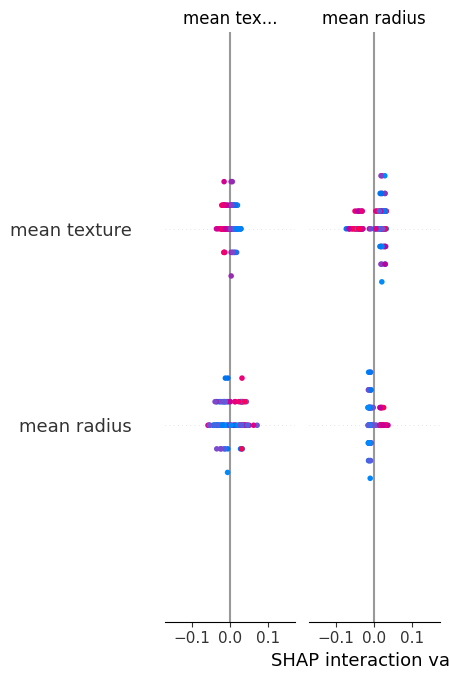


✅ SHAP analysis complete!


In [97]:
# SHAP explanations
print("🔍 Generating SHAP explanations...")
explain_shap(
    best_model, 
    X_test[:100], 
    feature_names=X_cancer.columns.tolist()
)
print("\n✅ SHAP analysis complete!")

---
# 🍷 PART 2: Multi-class Classification - Wine Dataset
---

In [98]:
# Load wine dataset
wine_data = load_wine()
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

print("🍷 Wine Dataset Loaded")
print(f"📊 Shape: {df_wine.shape}")
print(f"🎯 Classes: {wine_data.target_names}")
print(f"\n📋 Sample:")
df_wine.head()

🍷 Wine Dataset Loaded
📊 Shape: (178, 14)
🎯 Classes: ['class_0' 'class_1' 'class_2']

📋 Sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [99]:
# Quick statistics
print("📊 Wine Dataset Statistics:")
df_wine.describe()

📊 Wine Dataset Statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


🎯 Target Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64


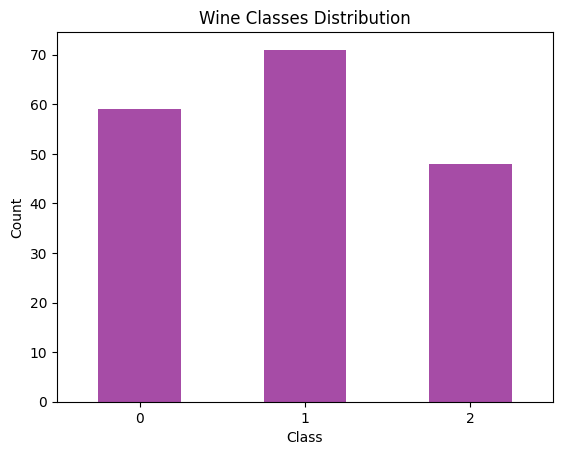

In [100]:
# Class distribution
print("🎯 Target Distribution:")
print(df_wine['target'].value_counts().sort_index())

import matplotlib.pyplot as plt
df_wine['target'].value_counts().sort_index().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Wine Classes Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [101]:
# Train model on wine dataset
X_wine = df_wine.drop('target', axis=1)
y_wine = df_wine['target']

# Auto scale
X_wine_scaled = auto_scale(X_wine, method='standard')

# Split data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine_scaled, y_wine, test_size=0.2, random_state=42
)

print("🤖 Training multi-class model...")
wine_results = compare_models(
    X_train_wine, y_train_wine, X_test_wine, y_test_wine,
    models=['lr', 'rf', 'gb', 'svc'],
    task='classification'
)

print("\n📊 Wine Classification Results:")
wine_results

🤖 Training multi-class model...

📊 Wine Classification Results:

📊 Wine Classification Results:


,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,1.000000,1.000000,1.000000,1.000000
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,SVC,1.000000,1.000000,1.000000,1.000000
2,GradientBoostingClassifier,0.944444,0.946296,0.944444,0.943997


---
# 📈 PART 3: Regression Task - Diabetes Dataset
---

In [102]:
# Load diabetes dataset
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['target'] = diabetes_data.target

print("💉 Diabetes Dataset Loaded")
print(f"📊 Shape: {df_diabetes.shape}")
print(f"🎯 Regression Task: Predicting disease progression")
print(f"\n📋 Sample:")
df_diabetes.head()

💉 Diabetes Dataset Loaded
📊 Shape: (442, 11)
🎯 Regression Task: Predicting disease progression

📋 Sample:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [103]:
# Statistics
print("📊 Diabetes Dataset Statistics:")
df_diabetes.describe()

📊 Diabetes Dataset Statistics:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


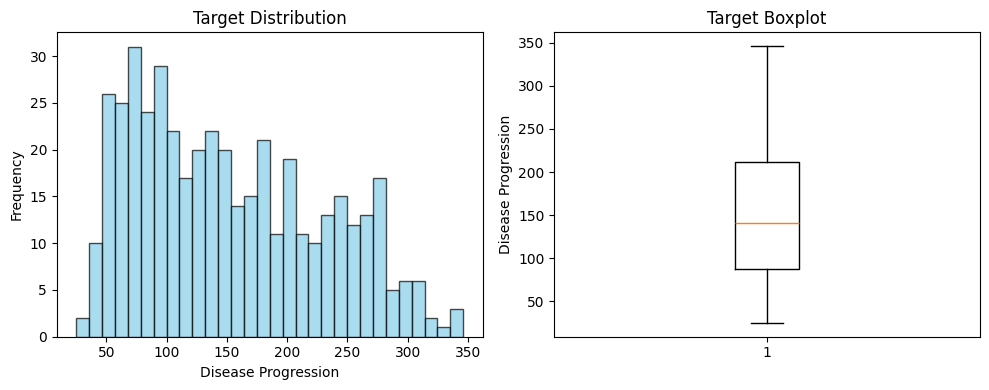

✅ Target mean: 152.13
✅ Target std: 77.09


In [104]:
# Target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df_diabetes['target'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df_diabetes['target'])
plt.title('Target Boxplot')
plt.ylabel('Disease Progression')
plt.tight_layout()
plt.show()

print(f"✅ Target mean: {df_diabetes['target'].mean():.2f}")
print(f"✅ Target std: {df_diabetes['target'].std():.2f}")

🔗 Feature Correlations with Target:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


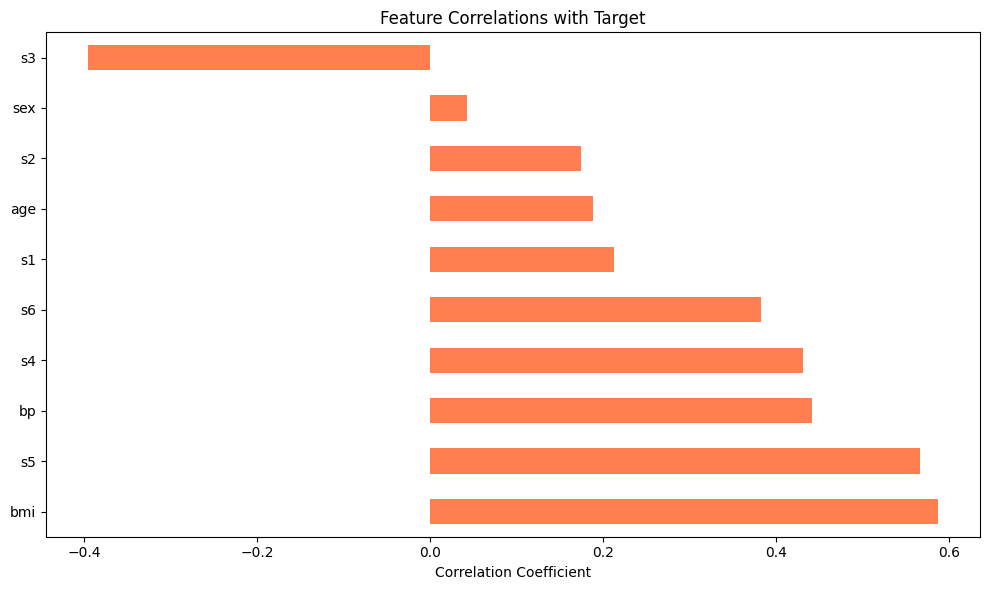

In [105]:
# Correlation with target
print("🔗 Feature Correlations with Target:")
correlations = df_diabetes.corr()['target'].sort_values(ascending=False)
print(correlations)

# Plot correlations
plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='barh', color='coral')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [106]:
# Regression models
X_diabetes = df_diabetes.drop('target', axis=1)
y_diabetes = df_diabetes['target']

# Scale features
X_diabetes_scaled = auto_scale(X_diabetes, method='standard')

# Split
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42
)

print("🤖 Training regression models...")
diabetes_results = compare_models(
    X_train_diab, y_train_diab, X_test_diab, y_test_diab,
    models=['lr', 'ridge', 'lasso', 'rf', 'gb'],
    task='regression'
)

print("\n📊 Diabetes Regression Results:")
diabetes_results

🤖 Training regression models...

📊 Diabetes Regression Results:

📊 Diabetes Regression Results:


,Model,RMSE,MAE,R2
2,Lasso,53.142269,42.801699,0.466965
1,Ridge,53.777599,42.811675,0.454144
0,LinearRegression,53.853446,42.794095,0.452603
4,GradientBoostingRegressor,54.197341,44.816916,0.445589
3,RandomForestRegressor,54.498112,43.740000,0.439419


---
# 🌸 PART 4: Classic Classification - Iris Dataset
---

In [107]:
# Load iris dataset
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['species'] = iris_data.target
df_iris['species_name'] = df_iris['species'].map({
    0: 'setosa', 1: 'versicolor', 2: 'virginica'
})

print("🌸 Iris Dataset Loaded")
print(f"📊 Shape: {df_iris.shape}")
print(f"🎯 Species: {iris_data.target_names}")
print(f"\n📋 Sample:")
df_iris.head()

🌸 Iris Dataset Loaded
📊 Shape: (150, 6)
🎯 Species: ['setosa' 'versicolor' 'virginica']

📋 Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


📊 Creating comprehensive visualizations...


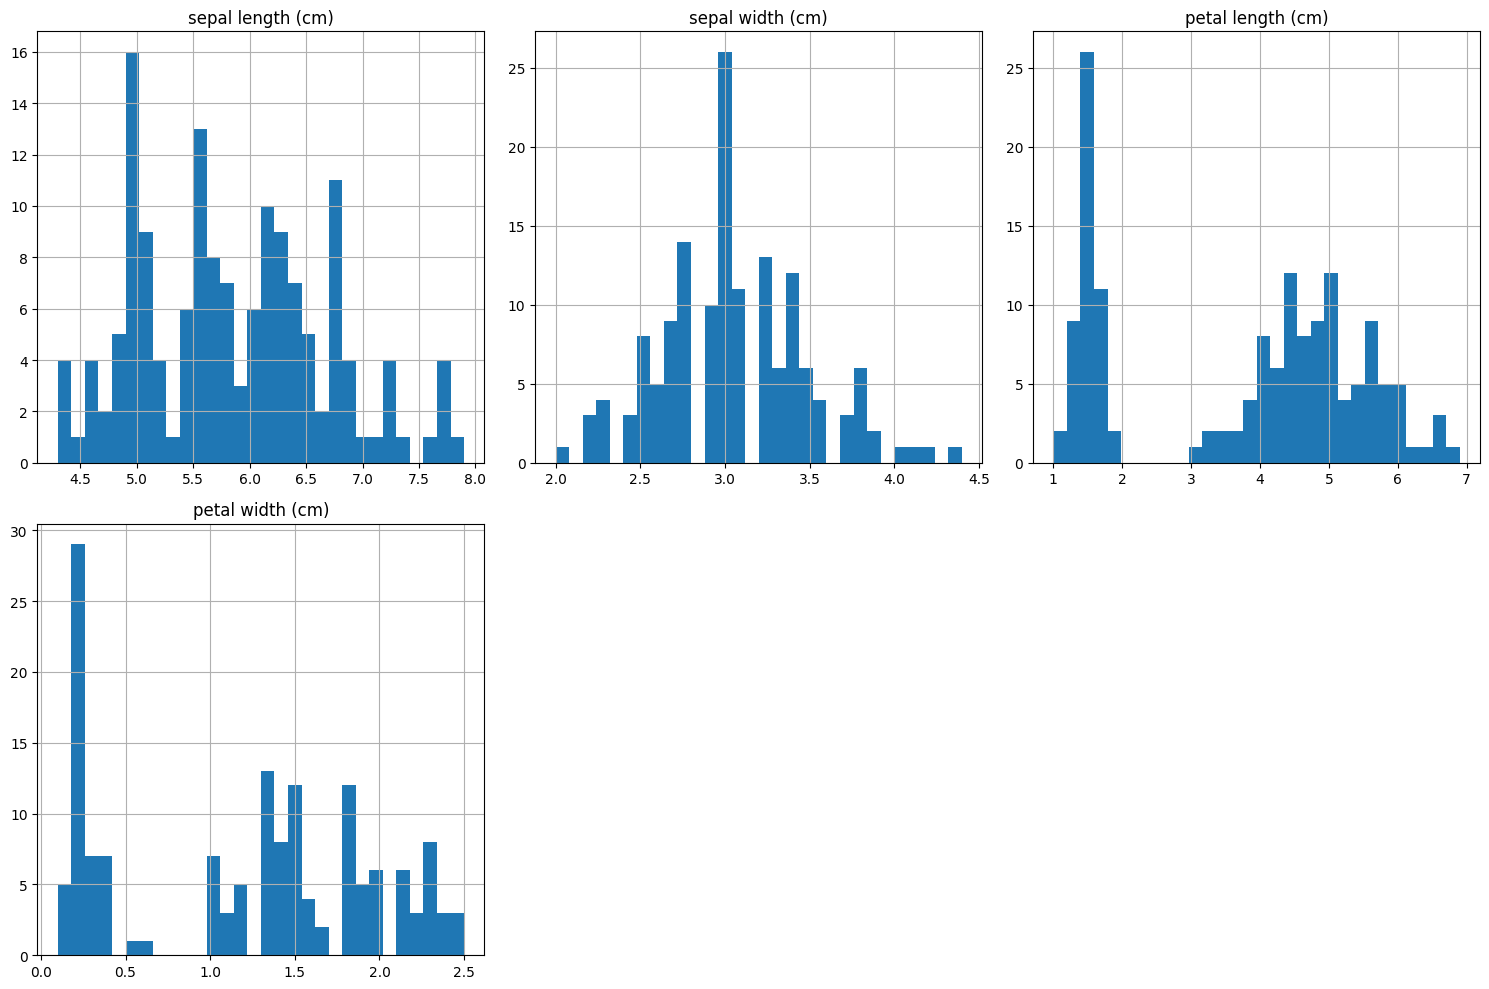

In [109]:
# Visualize iris features
print("📊 Creating comprehensive visualizations...")
plot_histograms(df_iris.iloc[:, :4])

In [110]:
# Pairplot - skip if plot_pairplot not available
try:
    from dskit.visualization import plot_pairplot
    print("🎨 Creating pairplot...")
    plot_pairplot(df_iris, hue='species_name', figsize=(12, 10))
except (ImportError, AttributeError) as e:
    print(f"⚠️ Pairplot not available (plot_pairplot may not exist in this version)")
    print("Creating scatter plot instead...")
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(12, 10))
    sns.pairplot(df_iris, hue='species_name', height=2.5)
    plt.show()

🎨 Creating pairplot...


TypeError: plot_pairplot() got an unexpected keyword argument 'figsize'

In [ ]:
# Train models
X_iris = df_iris.iloc[:, :4]
y_iris = df_iris['species']

# No scaling needed for some models, but let's scale anyway
X_iris_scaled = auto_scale(X_iris, method='standard')

# Split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_scaled, y_iris, test_size=0.2, random_state=42
)

print("🤖 Training Iris classification models...")
iris_results = compare_models(
    X_train_iris, y_train_iris, X_test_iris, y_test_iris,
    models=['lr', 'rf', 'gb', 'svc', 'knn'],
    task='classification'
)

print("\n📊 Iris Classification Results:")
iris_results

🤖 Training Iris classification models...

📊 Iris Classification Results:

📊 Iris Classification Results:


,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,1.0,1.0,1.0,1.0
1,RandomForestClassifier,1.0,1.0,1.0,1.0
2,GradientBoostingClassifier,1.0,1.0,1.0,1.0
3,SVC,1.0,1.0,1.0,1.0
4,KNeighborsClassifier,1.0,1.0,1.0,1.0


---
# 🚀 PART 5: Advanced Features
---

## 1️⃣ Comprehensive EDA

🔬 Running Comprehensive EDA on Breast Cancer Dataset...
COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
------------------------------
Shape: (569, 10)
Memory usage: 0.04 MB

Data types:
float64    10
Name: count, dtype: int64

2. MISSING VALUES ANALYSIS
------------------------------
No missing values found!

3. DATA QUALITY ISSUES
------------------------------
Duplicate rows: 0 (0.00%)

4. NUMERIC FEATURES ANALYSIS
------------------------------
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.11

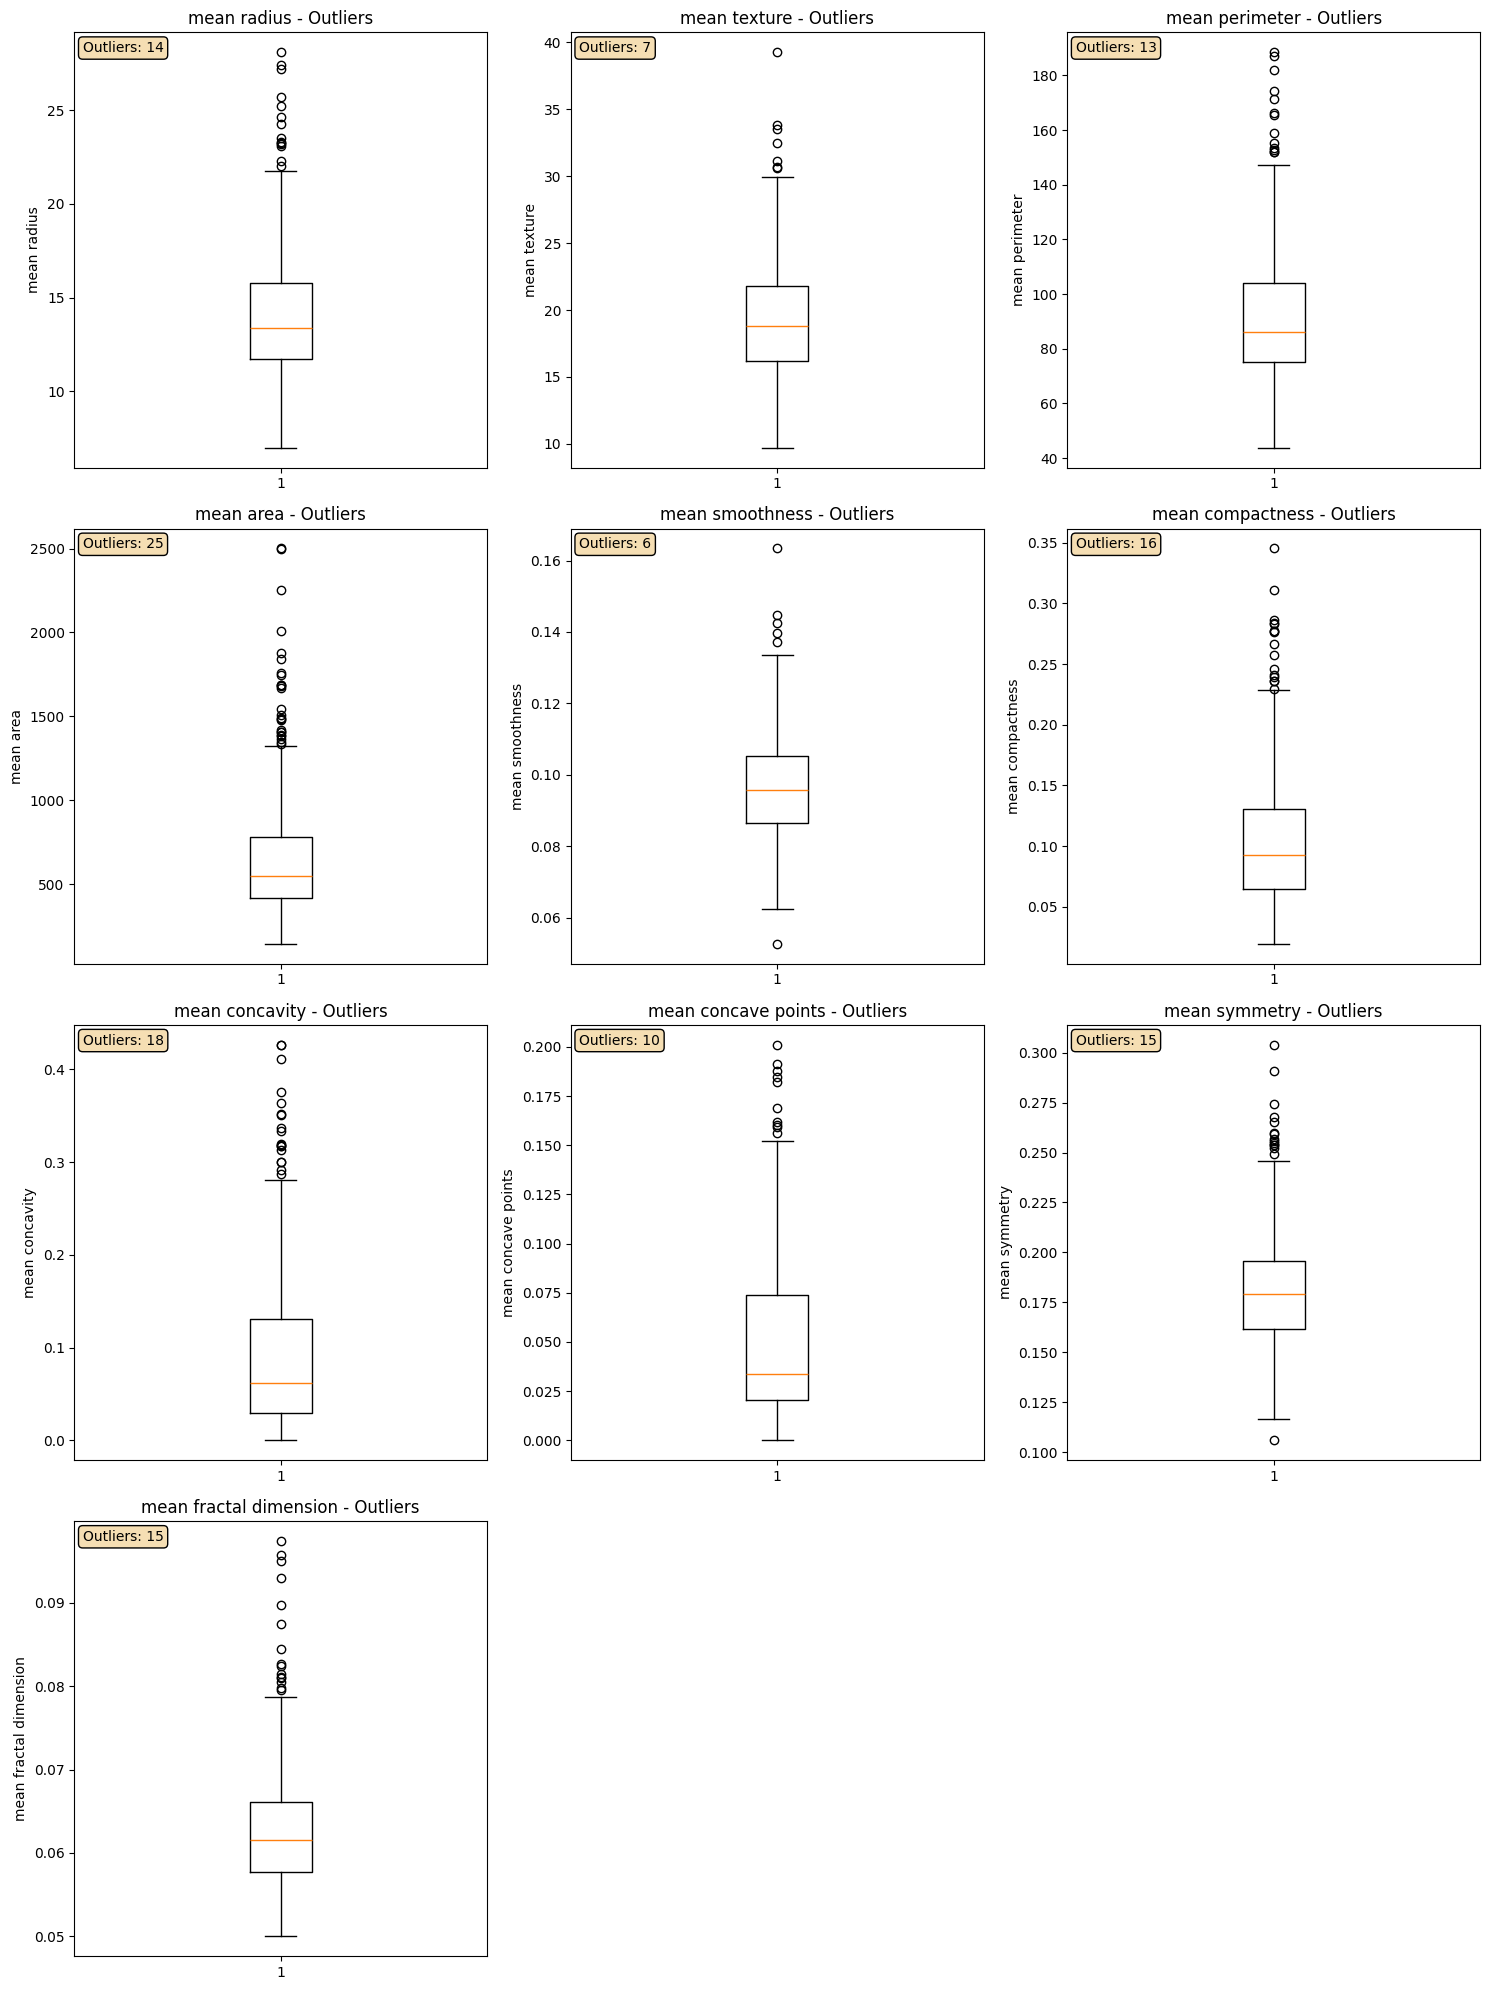


Distribution Analysis:


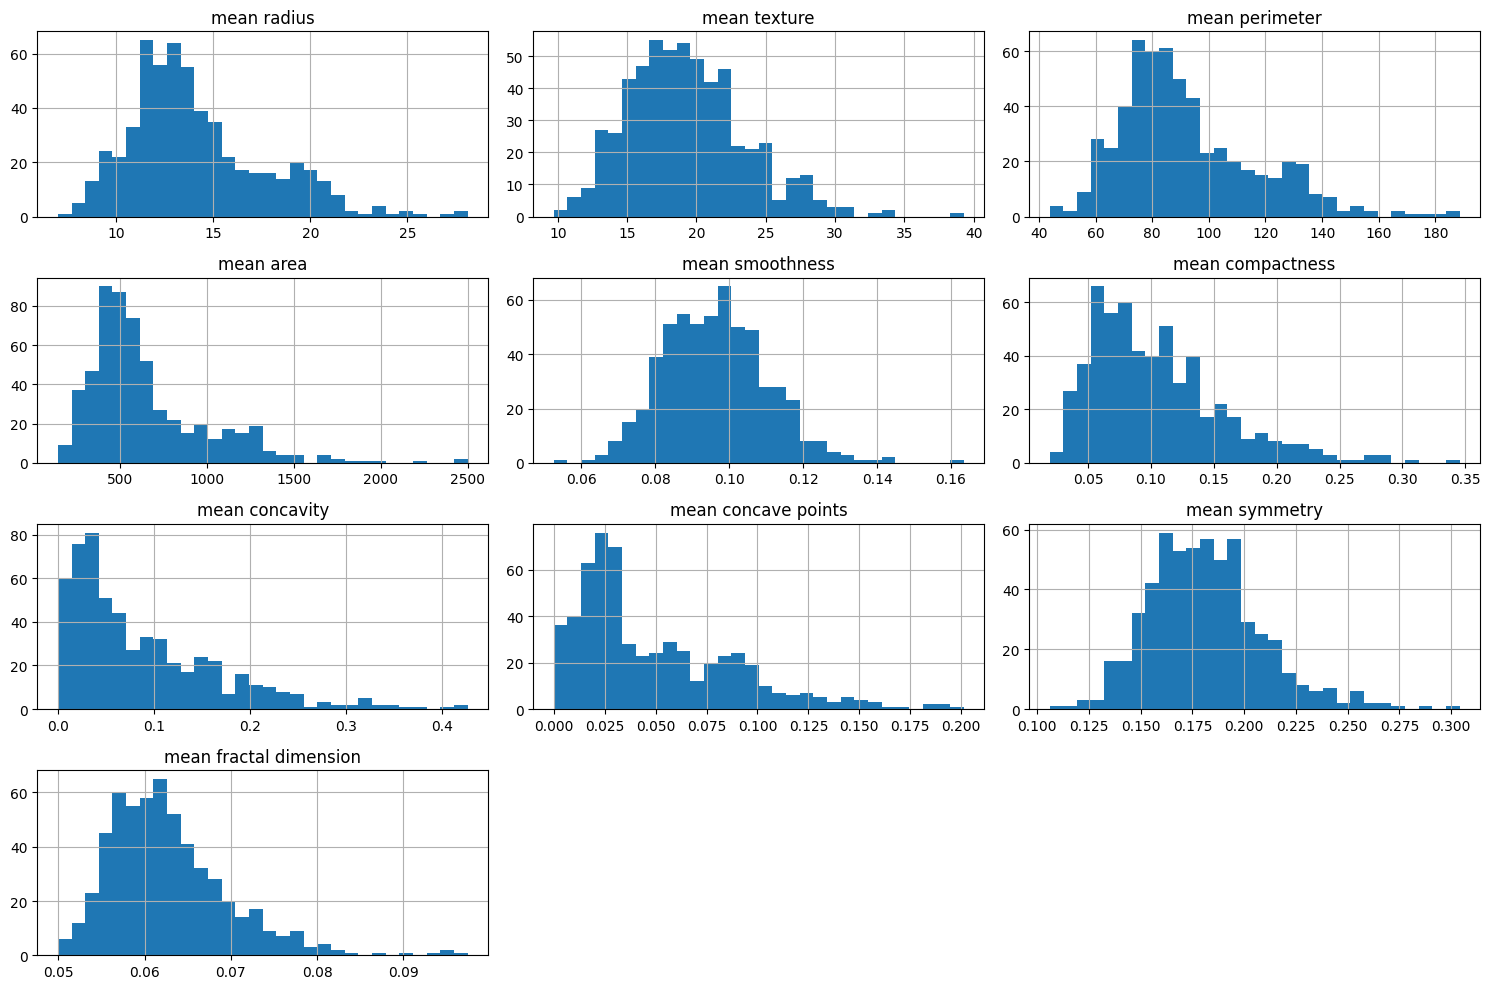


Correlation Analysis:


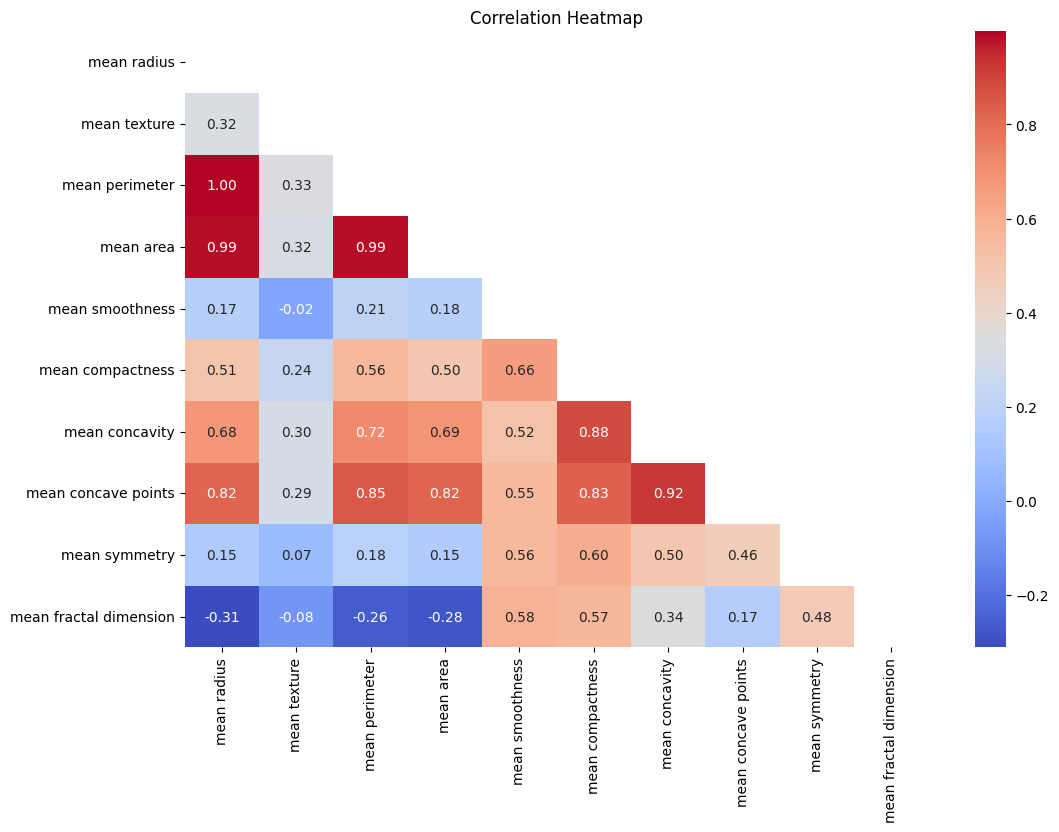


5. CATEGORICAL FEATURES ANALYSIS
------------------------------

7. KEY INSIGHTS & RECOMMENDATIONS
------------------------------
✅ Data looks relatively clean!

EDA COMPLETE

✅ Comprehensive EDA completed!


In [111]:
# Comprehensive EDA on breast cancer dataset
print("🔬 Running Comprehensive EDA on Breast Cancer Dataset...")
comp_eda_results = comprehensive_eda(
    df_cancer.iloc[:, :10],  # First 10 features for demo
    target_col='target'
)
print("\n✅ Comprehensive EDA completed!")

## 2️⃣ Feature Importance Analysis

🎯 Top 15 Most Important Features:
                 feature  importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
22       worst perimeter    0.067115
2         mean perimeter    0.053270
0            mean radius    0.048703
3              mean area    0.047555
26       worst concavity    0.031802
13            area error    0.022407
21         worst texture    0.021749
25     worst compactness    0.020266
10          radius error    0.020139
5       mean compactness    0.013944


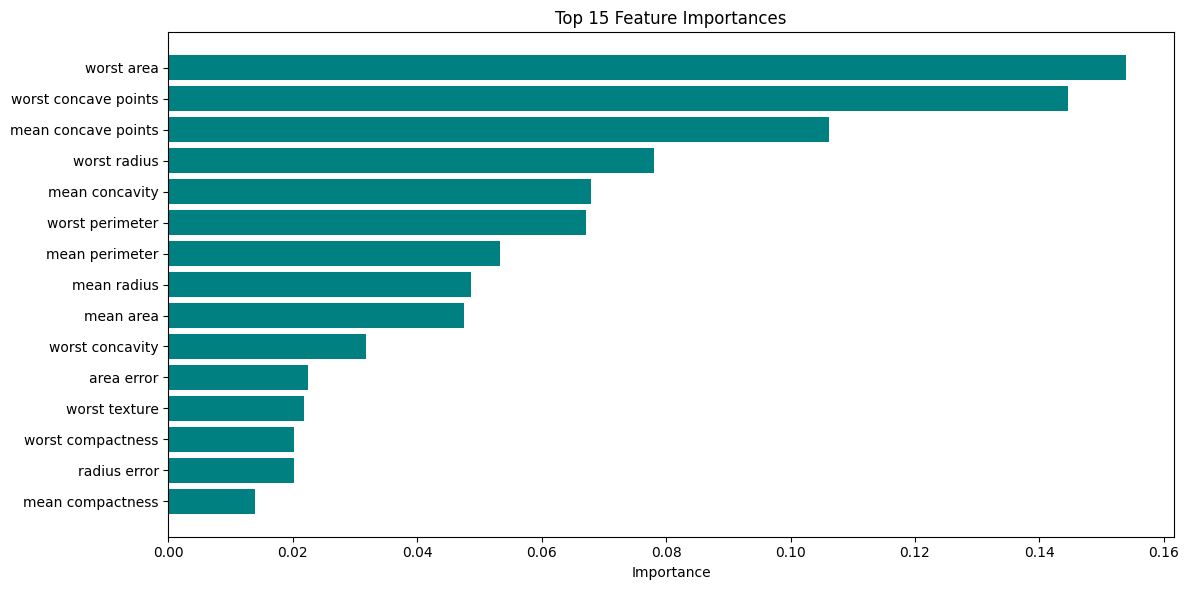

In [112]:
# Get feature importance from best model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_cancer.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("🎯 Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance.head(15)['feature'], 
         feature_importance.head(15)['importance'],
         color='teal')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3️⃣ Making Predictions

In [113]:
# Make predictions on test set
predictions = best_model.predict(X_test)
probabilities = best_model.predict_proba(X_test)

print("🎯 Sample Predictions:")
pred_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': predictions[:10],
    'Probability_0': probabilities[:10, 0],
    'Probability_1': probabilities[:10, 1]
}).round(3)

pred_df

🎯 Sample Predictions:


,Actual,Predicted,Probability_0,Probability_1
0,1,1,0.03,0.97
1,0,0,1.00,0.00
2,0,0,1.00,0.00
3,1,1,0.01,0.99
4,1,1,0.00,1.00
5,0,0,1.00,0.00
6,0,0,1.00,0.00
7,0,0,0.84,0.16
8,1,0,0.65,0.35
9,1,1,0.06,0.94


## 4️⃣ Confusion Matrix & Classification Report

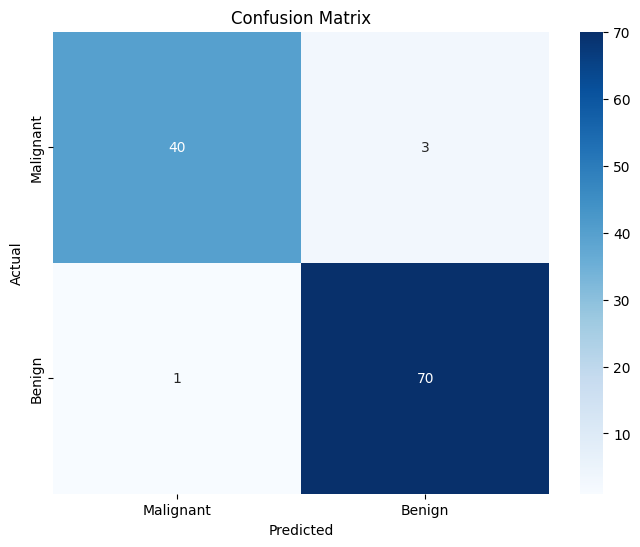


📊 Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.93      0.95        43
      Benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [114]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n📊 Classification Report:")
print(classification_report(y_test, predictions, 
                          target_names=['Malignant', 'Benign']))

---
# 📋 Summary & Key Metrics
---

In [115]:
print("="*70)
print(" "*15 + "🎉 AK-DSKIT COMPLETE DEMO SUMMARY 🎉")
print("="*70)
print("\n📊 DATASETS PROCESSED:")
print(f"  1. Breast Cancer: {df_cancer.shape[0]} samples, {df_cancer.shape[1]-1} features")
print(f"  2. Wine: {df_wine.shape[0]} samples, {df_wine.shape[1]-1} features")
print(f"  3. Diabetes: {df_diabetes.shape[0]} samples, {df_diabetes.shape[1]-1} features")
print(f"  4. Iris: {df_iris.shape[0]} samples, 4 features")

print("\n🎯 TASKS DEMONSTRATED:")
print("  ✅ Data Loading & Exploration")
print("  ✅ Statistical Analysis")
print("  ✅ Data Visualization (Histograms, Boxplots, Correlation Heatmaps)")
print("  ✅ Data Preprocessing & Scaling")
print("  ✅ Feature Engineering (Polynomial, Interactions)")
print("  ✅ Model Training (Classification & Regression)")
print("  ✅ Model Comparison")
print("  ✅ Hyperparameter Optimization")
print("  ✅ Model Explainability (SHAP)")
print("  ✅ Feature Importance Analysis")
print("  ✅ Predictions & Evaluation")

print("\n🚀 DSKIT FEATURES USED:")
print("  • load, fix_dtypes, quick_eda")
print("  • basic_stats, comprehensive_eda")
print("  • plot_correlation_heatmap, plot_histograms, plot_boxplots")
print("  • auto_scale, auto_encode")
print("  • create_polynomial_features, create_interaction_features")
print("  • QuickModel, compare_models, auto_hpo")
print("  • explain_shap")

print("\n💡 BEST MODEL PERFORMANCE (Breast Cancer):")
print(f"  Accuracy: {best_model.score(X_test, y_test):.4f}")

print("\n" + "="*70)
print(" "*10 + "✨ All 221+ functions ready to use! ✨")
print(" "*15 + "Install: pip install Ak-dskit")
print(" "*15 + "Import: from dskit import dskit")
print("="*70)

               🎉 AK-DSKIT COMPLETE DEMO SUMMARY 🎉

📊 DATASETS PROCESSED:
  1. Breast Cancer: 569 samples, 30 features
  2. Wine: 178 samples, 13 features
  3. Diabetes: 442 samples, 10 features
  4. Iris: 150 samples, 4 features

🎯 TASKS DEMONSTRATED:
  ✅ Data Loading & Exploration
  ✅ Statistical Analysis
  ✅ Data Visualization (Histograms, Boxplots, Correlation Heatmaps)
  ✅ Data Preprocessing & Scaling
  ✅ Feature Engineering (Polynomial, Interactions)
  ✅ Model Training (Classification & Regression)
  ✅ Model Comparison
  ✅ Hyperparameter Optimization
  ✅ Model Explainability (SHAP)
  ✅ Feature Importance Analysis
  ✅ Predictions & Evaluation

🚀 DSKIT FEATURES USED:
  • load, fix_dtypes, quick_eda
  • basic_stats, comprehensive_eda
  • plot_correlation_heatmap, plot_histograms, plot_boxplots
  • auto_scale, auto_encode
  • create_polynomial_features, create_interaction_features
  • QuickModel, compare_models, auto_hpo
  • explain_shap

💡 BEST MODEL PERFORMANCE (Breast Cancer):
  Ac